# IMPORTING LIBRAIRES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
%matplotlib inline

# loading the dataset

In [2]:
data = pd.read_csv("Dataset/training_data.csv")

In [3]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
data.shape

(31962, 3)

In [5]:
data.size

95886

In [6]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64



# DATA PREPROCESSING

# Cleaning the data

In [9]:
# removing handle names
def remove_handle(tweet):
    match = re.findall("@[\w]*",tweet)
    for i in match:
        tweet = re.sub(i,'',tweet)
    return tweet

In [10]:
vector = np.vectorize(remove_handle)

In [11]:
data['tweets without handle'] = vector(data['tweet'])

In [12]:
data.head()

,id,label,tweet,tweets without handle
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


# Removing punctuation's,numbers and symbols

In [13]:
data['tweets without handle'] = data['tweets without handle'].str.replace("[^a-zA-Z#]"," ")

In [14]:
data.head()

,id,label,tweet,tweets without handle
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [15]:
data.tail()

,id,label,tweet,tweets without handle
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised in in #calgary #wso...
31961,31962,0,thank you @user for you follow,thank you for you follow


In [16]:
data['tweets without handle'] = data['tweets without handle'].str.replace("[^a-zA-Z#]"," ")

In [17]:
#tokenize the words
tokenized_tweets = data['tweets without handle'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: tweets without handle, dtype: object

In [18]:
#sTEMMING THE WORDS
from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda x : [ps.stem(word) for word in x])
tokenized_tweets.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can, t, use, ca...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                    [factsguid, societi, now, #motiv]
Name: tweets without handle, dtype: object

In [19]:
#TOKENIZED THE WORD
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])
data['tweets without handle'] = tokenized_tweets
data.head()

,id,label,tweet,tweets without handle
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can t use caus they d...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguid societi now #motiv


In [20]:
data.tail()

,id,label,tweet,tweets without handle
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwav tri to wrap h...
31959,31960,0,listening to sad songs on a monday morning otw...,listen to sad song on a monday morn otw to wor...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #templ vandalis in in #calgari #wso cond...
31961,31962,0,thank you @user for you follow,thank you for you follow


# DATA VISUALIZATION

# Using word cloud

In [21]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [22]:
allpositive = ' '.join(text for text in data['tweets without handle'][data['label']==0])

In [23]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))


image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(allpositive)

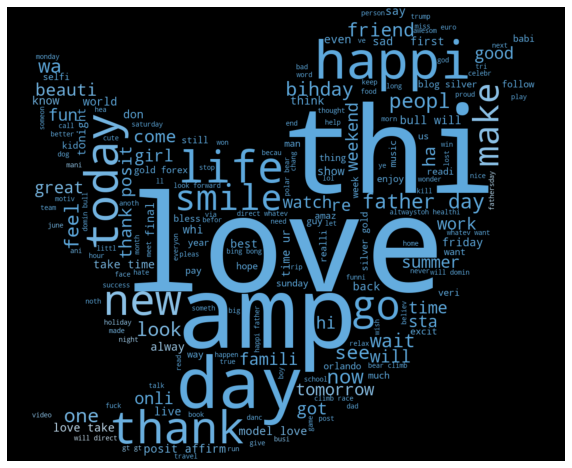

In [24]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [25]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/newhp/iron-spiderman-clipart-spiderman-png-marvel-avengers-assemble-iron-man-full-body-115629484241slwjnw2ei.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(allpositive)

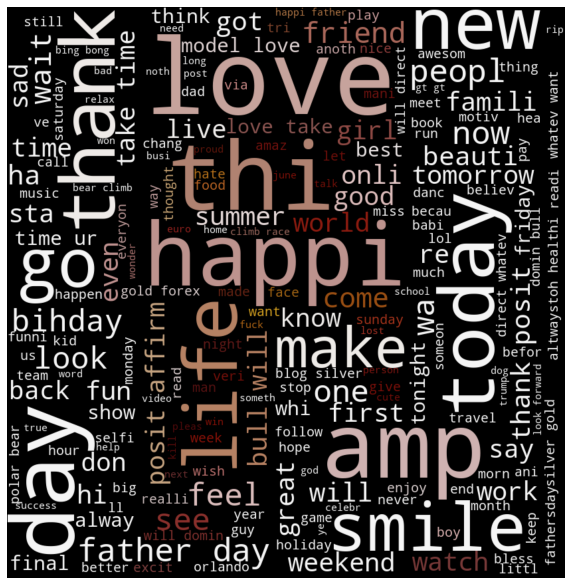

In [26]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

# Plotting Bar Plot for positive words

In [27]:
def extract_hashtags(x):
    hastags = []
    for i in x:
        hastags.append(re.findall(r"#(\w+)",i))
    return hastags                       

In [28]:
positive_tweets = extract_hashtags(data['tweets without handle'][data['label']==0])

In [29]:
len(positive_tweets)

29720

In [30]:
u_positive_tweets = sum(positive_tweets,[])

In [31]:
postive_freq = nltk.FreqDist(u_positive_tweets)

In [32]:
postive_freq

FreqDist({'run': 72,
          'lyft': 2,
          'disapoint': 1,
          'getthank': 2,
          'model': 375,
          'motiv': 202,
          'allshowandnogo': 1,
          'school': 30,
          'exam': 9,
          'hate': 27,
          'imagin': 7,
          'actorslif': 8,
          'revolutionschool': 1,
          'girl': 283,
          'allin': 4,
          'cav': 12,
          'champion': 5,
          'cleveland': 9,
          'clevelandcavali': 1,
          'gr': 3,
          'ireland': 18,
          'blog': 356,
          'silver': 300,
          'gold': 301,
          'forex': 265,
          'orlando': 239,
          'standwithorlando': 2,
          'pulseshoot': 11,
          'orlandoshoot': 61,
          'biggerproblem': 1,
          'selfish': 3,
          'heabreak': 19,
          'valu': 8,
          'love': 1654,
          'gettingf': 1,
          'got': 9,
          'junior': 3,
          'yugyoem': 1,
          'omg': 27,
          'thank': 534,
          'p

In [33]:
positive_df = pd.DataFrame({'Hashtags':list(postive_freq.keys()),'Counts':list(postive_freq.values())})

In [34]:
positive_df

,Hashtags,Counts
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
...,...,...
19665,ucsd,1
19666,berlincitygirl,1
19667,z,1
19668,genf,1


In [35]:
top_positive = positive_df.nlargest(30,columns = 'Counts')

In [36]:
top_positive.head()

,Hashtags,Counts
33,love,1654
40,posit,917
60,smile,676
160,healthi,573
39,thank,534


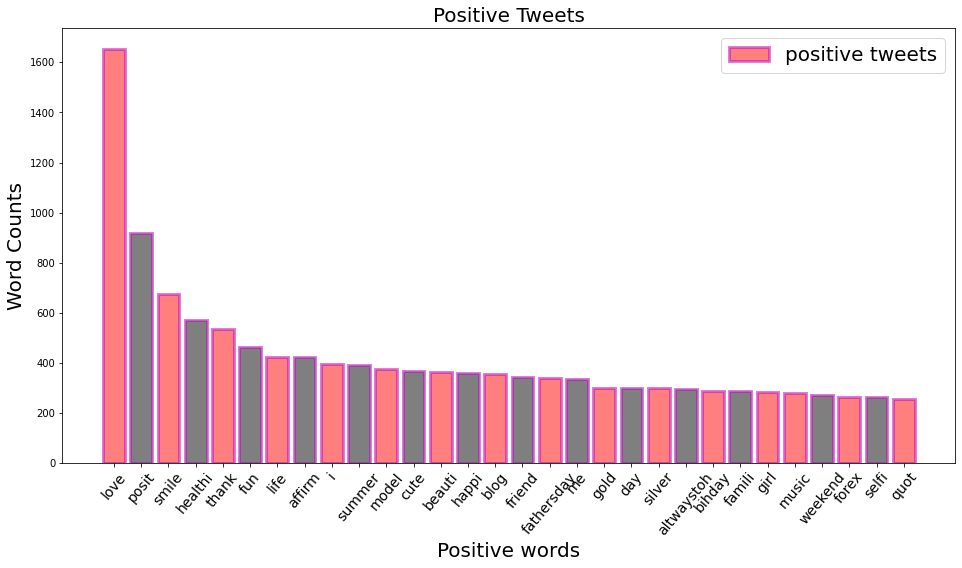

In [37]:
plt.figure(figsize=(16,8))
color=["r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r"]
plt.title("Positive Tweets",fontsize=20)
plt.bar(top_positive['Hashtags'],top_positive['Counts'],color=color,alpha=0.5 ,label="positive tweets",edgecolor="m",linewidth=3,linestyle="-")
plt.xlabel("Positive words",fontsize=20)
plt.ylabel("Word Counts",fontsize=20)
plt.xticks(rotation=50,fontsize=14)
plt.legend(fontsize=20)
plt.show()



# Plotting pie chart fro positive words

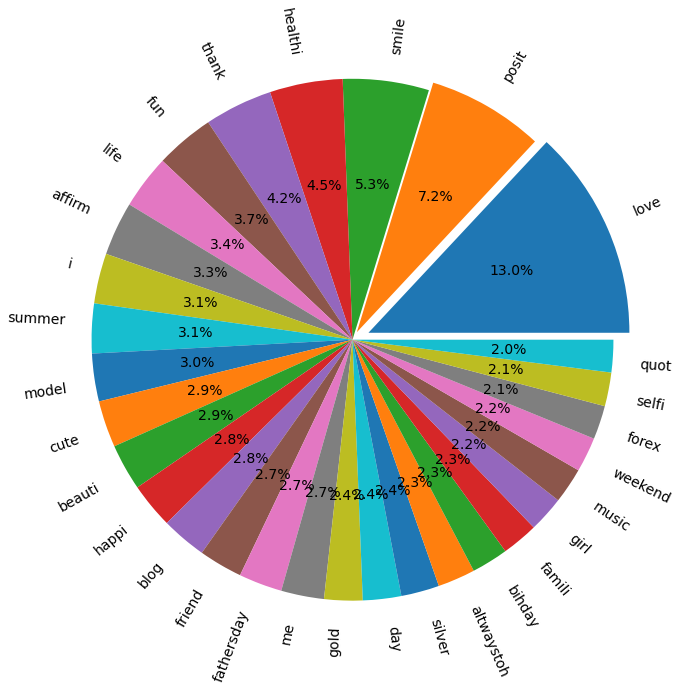

In [38]:
explode = np.zeros(30)
explode[0]=0.2
explode[1]=0.1
plt.pie(top_positive['Counts'],labels=top_positive['Hashtags'],autopct="%0.1f%%",explode=explode,radius=3,rotatelabels="true",textprops={"fontsize":14})
plt.show()

# Plotting bar plot for negative words

In [39]:
negative_tweets = extract_hashtags(data['tweets without handle'][data['label']==1])

In [40]:
len(negative_tweets)

2242

In [41]:
u_negative_tweets = sum(negative_tweets,[])

In [42]:
negative_freq = nltk.FreqDist(u_negative_tweets)

In [43]:
negative_df = pd.DataFrame({'Hashtags':list(negative_freq.keys()),'Counts':list(negative_freq.values())})

In [44]:
negative_df.head()

,Hashtags,Counts
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


In [45]:
top_neagtive = negative_df.nlargest(30,columns = 'Counts')

In [46]:
top_neagtive.head()

,Hashtags,Counts
22,trump,136
31,polit,95
64,allahsoil,92
30,liber,81
28,libtard,77


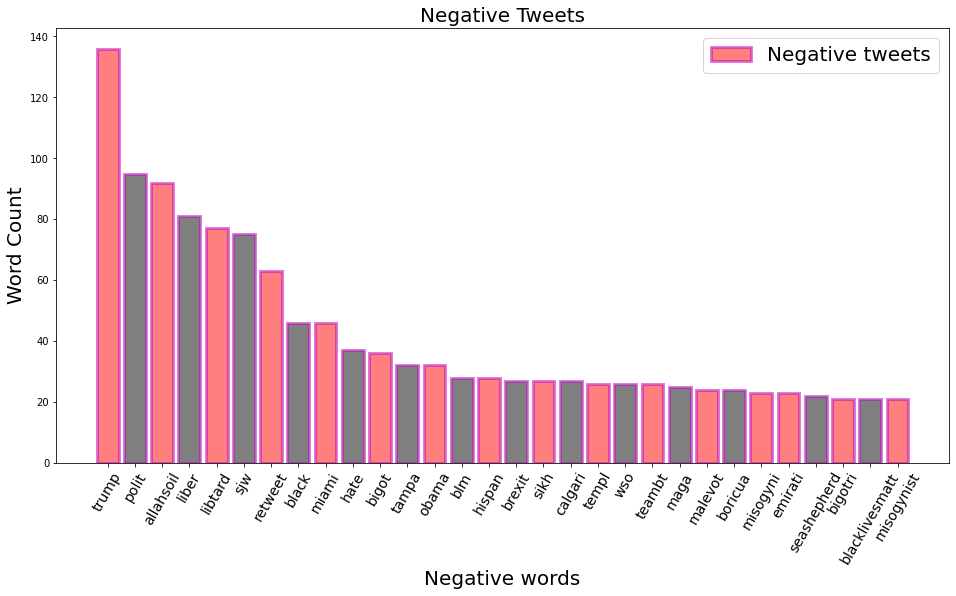

In [47]:
plt.figure(figsize=(16,8))
color=["r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r","k","r"]
plt.title("Negative Tweets",fontsize=20)
plt.bar(top_neagtive['Hashtags'],top_neagtive['Counts'],color=color,alpha=0.5 ,label="Negative tweets",edgecolor="m",linewidth=3,linestyle="-")
plt.xlabel("Negative words",fontsize=20)
plt.ylabel("Word Count",fontsize=20)
plt.xticks(rotation=60,fontsize=14)
plt.legend(fontsize=20)
plt.show()

# Plotting Pie chart for negative words

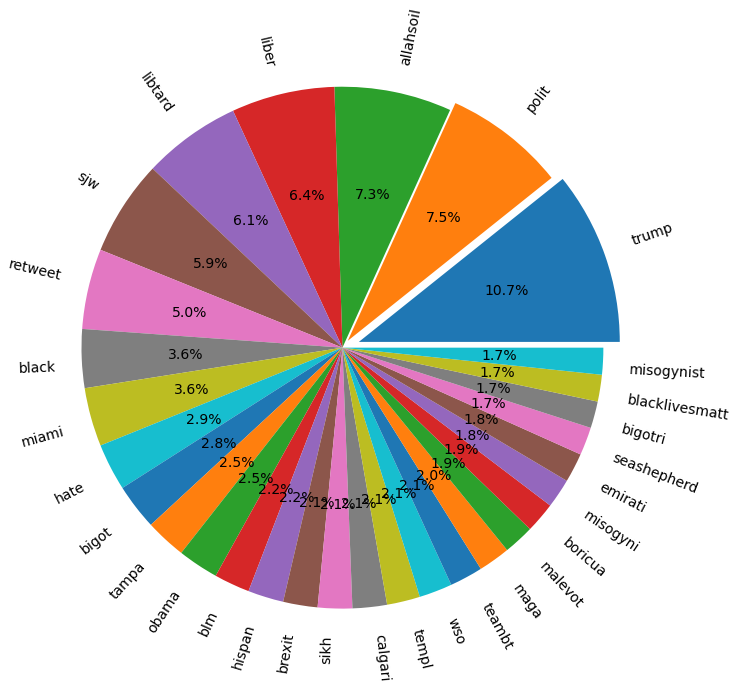

In [48]:
explode = np.zeros(30)
explode[0]=0.2
explode[1]=0.1
plt.pie(top_neagtive['Counts'],labels=top_neagtive['Hashtags'],autopct="%0.1f%%",explode=explode,radius=3,rotatelabels="true",textprops={"fontsize":14})
plt.show()

# Feature Extraction

# Using CountVectorizer

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
vectorizer_bow = CountVectorizer(max_features=6000,stop_words='english',ngram_range=(1,4))
x_bow = vectorizer_bow.fit_transform(data['tweets without handle']).toarray()

In [51]:
x_bow.shape

(31962, 6000)

In [52]:
y_bow = data['label']

In [53]:
y_bow.shape

(31962,)

In [54]:
from sklearn.model_selection import train_test_split
xtrain_bow,xtest_bow,ytrain_bow,ytest_bow = train_test_split(x_bow,y_bow,test_size=0.2,random_state=3)

In [55]:
#checking features names
vectorizer_bow.get_feature_names()

['aap',
 'ab',
 'abandon',
 'abc',
 'abl',
 'abov',
 'abrahamhick',
 'abrahamhick lawofattract',
 'abrahamhick lawofattract healthi',
 'abrahamhick lawofattract healthi heal',
 'absolut',
 'abt',
 'abund',
 'abus',
 'accept',
 'accept amp',
 'accept amp sale',
 'accept amp sale photographi',
 'access',
 'accessori',
 'accid',
 'accord',
 'account',
 'accus',
 'ace',
 'ach',
 'achiev',
 'acn',
 'acn altwaystoh',
 'acn altwaystoh healthi',
 'acn altwaystoh healthi heal',
 'act',
 'act like',
 'action',
 'activ',
 'activist',
 'actor',
 'actor seeklearn',
 'actor seeklearn stafresh',
 'actorslif',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'adapt environ',
 'adapt environ need',
 'adapt environ need tear',
 'add',
 'add follow',
 'addict',
 'addit',
 'address',
 'adel',
 'admit',
 'adopt',
 'ador',
 'adult',
 'advanc',
 'advantag',
 'adveis',
 'adventur',
 'advic',
 'advoc',
 'af',
 'affair',
 'affect',
 'affirm',
 'afford',
 'afraid',
 'africa',
 'african',
 'african american',
 '

In [56]:
vectorizer_bow.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 6000,
 'min_df': 1,
 'ngram_range': (1, 4),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [57]:
count_df = pd.DataFrame(x_bow,columns = vectorizer_bow.get_feature_names())

In [58]:
count_df.head()

,aap,ab,abandon,abc,abl,abov,abrahamhick,abrahamhick lawofattract,abrahamhick lawofattract healthi,abrahamhick lawofattract healthi heal,absolut,abt,abund,abus,accept,accept amp,accept amp sale,accept amp sale photographi,access,accessori,accid,accord,account,accus,ace,ach,achiev,acn,acn altwaystoh,acn altwaystoh healthi,acn altwaystoh healthi heal,act,act like,action,activ,activist,actor,actor seeklearn,actor seeklearn stafresh,actorslif,...,yeah good bing,yeah good bing bong,year,year ago,year anniversari,year intern,year intern femal,year intern femal oppress,year later,year old,year wait,yelchin,yell,yellow,yep,yesterday,yo,yoga,yogi,yolo,york,young,youth,youtub,youtub video,yoy,yr,yr ago,yr old,yum,yummi,yup,yyc,zara,zealand,zelda,zen,zero,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# By TfidfVectorizer 

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tdif = TfidfVectorizer(max_features=6000,stop_words='english',ngram_range=(1,4))

In [61]:
x_tdif = x_tdif.todense()
x_tdif

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
y_tdif=data['label']

In [63]:
y_tdif

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
xtrain_tdif,xtest_tdif,ytrain_tdif,ytest_tdif = train_test_split(x_tdif,y_tdif,test_size=0.2,random_state=3)

In [65]:
xtrain_tdif

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
xtrain_tdif.shape

(25569, 6000)

In [67]:
ytrain_tdif.shape

(25569,)

# Building model

# Multinomial Naive Bayes

# By using countvectorizer

In [68]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [69]:
nb.fit(xtrain_bow,ytrain_bow)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
ytest_nb_bow_pred = nb.predict(xtest_bow)

In [71]:
from sklearn import metrics

In [72]:
ytest_nb_bow_score = metrics.accuracy_score(ytest_bow,ytest_nb_bow_pred)

In [73]:
ytest_nb_bow_score*100

94.94759893633662

In [74]:
ytest_nb_bow_confusion_matrix = metrics.confusion_matrix(ytest_bow,ytest_nb_bow_pred)

In [75]:
ytest_nb_bow_confusion_matrix

array([[5766,  184],
       [ 139,  304]])

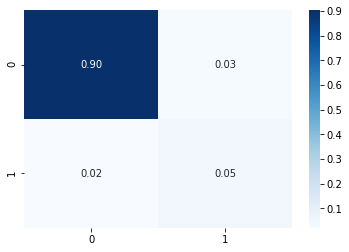

In [76]:
sns.heatmap(ytest_nb_bow_confusion_matrix/np.sum(ytest_nb_bow_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

In [77]:
metrics.classification_report(ytest_bow,ytest_nb_bow_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.97      5950\n           1       0.62      0.69      0.65       443\n\n    accuracy                           0.95      6393\n   macro avg       0.80      0.83      0.81      6393\nweighted avg       0.95      0.95      0.95      6393\n'

# By using tdidf-vector

In [78]:
nb.fit(xtrain_tdif,ytrain_tdif)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [79]:
ytest_nb_tdif_pred = nb.predict(xtest_tdif)

In [80]:
from sklearn import metrics

In [81]:
ytest_nb_tdif_score = metrics.accuracy_score(ytest_tdif,ytest_nb_tdif_pred)

In [82]:
ytest_nb_tdif_score*100

94.83810417644298

In [83]:
ytest_nb_tdif_confusion_matrix = metrics.confusion_matrix(ytest_tdif,ytest_nb_tdif_pred)

In [84]:
ytest_nb_tdif_confusion_matrix

array([[5917,   33],
       [ 297,  146]])

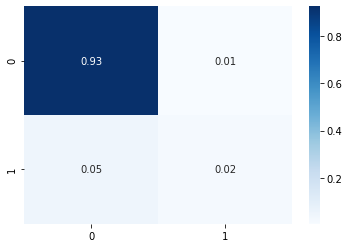

In [85]:
sns.heatmap(ytest_nb_tdif_confusion_matrix/np.sum(ytest_nb_tdif_confusion_matrix),annot=True,cmap='Blues',fmt='.2f')

In [86]:
metrics.classification_report(ytest_tdif,ytest_nb_tdif_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97      5950\n           1       0.82      0.33      0.47       443\n\n    accuracy                           0.95      6393\n   macro avg       0.88      0.66      0.72      6393\nweighted avg       0.94      0.95      0.94      6393\n'

# LOGISTIC REGRESSION

# By using CountVectorizer

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr = LogisticRegression(random_state=0)

In [89]:
lr.fit(xtrain_bow,ytrain_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
ytest_lr_bow_pred = lr.predict(xtest_bow)

In [91]:
from sklearn import metrics

In [92]:
ytest_lr_bow_score = metrics.accuracy_score(ytest_bow,ytest_lr_bow_pred)

In [93]:
ytest_lr_bow_score*100

96.01126231816049

In [94]:
ytest_lr_bow_confusion_matrix = metrics.confusion_matrix(ytest_bow,ytest_lr_bow_pred)

In [95]:
ytest_lr_bow_confusion_matrix

array([[5904,   46],
       [ 209,  234]])

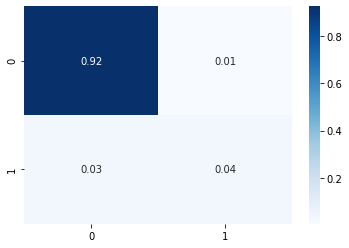

In [96]:
sns.heatmap(ytest_lr_bow_confusion_matrix/np.sum(ytest_lr_bow_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

In [97]:
metrics.classification_report(ytest_bow,ytest_lr_bow_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98      5950\n           1       0.84      0.53      0.65       443\n\n    accuracy                           0.96      6393\n   macro avg       0.90      0.76      0.81      6393\nweighted avg       0.96      0.96      0.96      6393\n'

# By using tdidf vector

In [98]:
lr.fit(xtrain_tdif,ytrain_tdif)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
ytest_lr_tdif_pred = lr.predict(xtest_tdif)

In [100]:
from sklearn import metrics

In [101]:
ytest_lr_tdif_score = metrics.accuracy_score(ytest_tdif,ytest_lr_tdif_pred)

In [102]:
ytest_lr_tdif_score*100

95.32300954168622

In [103]:
ytest_lr_tdif_confusion_matrix = metrics.confusion_matrix(ytest_tdif,ytest_lr_tdif_pred)

In [104]:
ytest_lr_tdif_confusion_matrix

array([[5933,   17],
       [ 282,  161]])

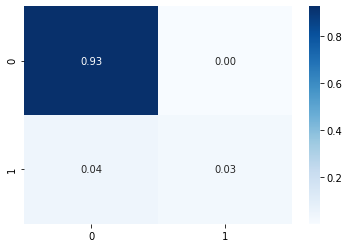

In [105]:
sns.heatmap(ytest_lr_tdif_confusion_matrix/np.sum(ytest_lr_tdif_confusion_matrix),annot=True,cmap='Blues',fmt='.2f')

In [106]:
metrics.classification_report(ytest_tdif,ytest_lr_tdif_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.98      5950\n           1       0.90      0.36      0.52       443\n\n    accuracy                           0.95      6393\n   macro avg       0.93      0.68      0.75      6393\nweighted avg       0.95      0.95      0.94      6393\n'

# K Nearest Neighbors

# Using Count Vectorizer

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
neighbors=KNeighborsClassifier(n_neighbors=1)

In [109]:
neighbors.fit(xtrain_bow,ytrain_bow)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [110]:
ytest_bow_predict=neighbors.predict(xtest_bow)

In [111]:
from sklearn import metrics
bow_accuracy_score=metrics.accuracy_score(ytest_bow,ytest_bow_predict)

In [112]:
print(bow_accuracy_score*100)

93.75879868606289


we cannot take the value of k to be 1 because there is a possibilty that the point which is nearest to the point to be predicted might be just a noisy value or an outliner therefore we will search for the value of k where there will be minimum error

# we found that the minimum error is found where value of k=3 

In [113]:
neighbour=KNeighborsClassifier(n_neighbors=3)
neighbors.fit(xtrain_bow,ytrain_bow)
ytest_bow_predict=neighbors.predict(xtest_bow)

In [114]:
from sklearn import metrics
bow_accuracy_score=metrics.accuracy_score(ytest_bow,ytest_bow_predict)

In [115]:
print(bow_accuracy_score*100)

93.75879868606289


In [116]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
print(classification_report(ytest_bow,ytest_bow_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5950
           1       0.56      0.45      0.50       443

    accuracy                           0.94      6393
   macro avg       0.76      0.71      0.73      6393
weighted avg       0.93      0.94      0.93      6393



In [118]:
ytest_bow_confusion_matrix=metrics.confusion_matrix(ytest_bow,ytest_bow_predict)

In [119]:
ytest_bow_confusion_matrix

array([[5794,  156],
       [ 243,  200]])

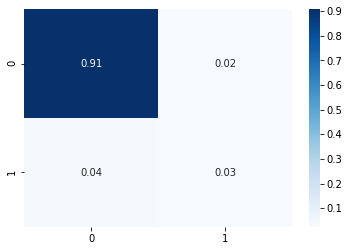

In [120]:
import seaborn as sns
sns.heatmap(ytest_bow_confusion_matrix/np.sum(ytest_bow_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

# Using TFIDF 

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
neighbors_tfidf=KNeighborsClassifier(n_neighbors=1)

In [123]:
neighbors_tfidf.fit(xtrain_tdif,ytrain_tdif)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [124]:
ytest_tfidf_pred=neighbors_tfidf.predict(xtest_tdif)

In [125]:
from sklearn import metrics
accuracy_score_tfidf=metrics.accuracy_score(ytest_tdif,ytest_tfidf_pred)
print(accuracy_score_tfidf*100)

94.36884091975598


we need to find the value of k with minimum error ie k=3

In [126]:
neighbors=KNeighborsClassifier(n_neighbors=3)
neighbors.fit(xtrain_tdif,ytrain_tdif)
ytest_tfidf_pred=neighbors.predict(xtest_tdif)

In [127]:
from sklearn import metrics
accuracy_score_tfidf=metrics.accuracy_score(ytest_tdif,ytest_tfidf_pred)
print(accuracy_score_tfidf)

0.9452526200531832


In [128]:
from sklearn.metrics import confusion_matrix,classification_report

In [129]:
print(classification_report(ytest_tdif,ytest_tfidf_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5950
           1       0.85      0.25      0.39       443

    accuracy                           0.95      6393
   macro avg       0.90      0.62      0.68      6393
weighted avg       0.94      0.95      0.93      6393



In [130]:
ytest_tfidf_confusion_matrix=metrics.confusion_matrix(ytest_tdif,ytest_tfidf_pred)

In [131]:
ytest_tfidf_confusion_matrix

array([[5931,   19],
       [ 331,  112]])

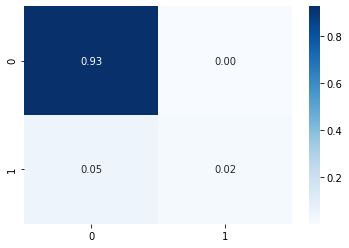

In [132]:
import seaborn as sns
sns.heatmap(ytest_tfidf_confusion_matrix/np.sum(ytest_tfidf_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

# Passive Agressive Classifier


# Using Count Vectorizer

In [133]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [134]:
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(xtrain_bow,ytrain_bow)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [135]:
ytest_bow_pred=passive.predict(xtest_bow)

In [136]:
from sklearn import metrics
bow_accuracy_score=metrics.accuracy_score(ytest_bow,ytest_bow_pred)
print(bow_accuracy_score*100)

94.47833567964962


In [137]:
from sklearn.metrics import confusion_matrix,classification_report

In [138]:
print(classification_report(ytest_bow,ytest_bow_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5950
           1       0.59      0.66      0.62       443

    accuracy                           0.94      6393
   macro avg       0.78      0.81      0.80      6393
weighted avg       0.95      0.94      0.95      6393



In [139]:
ytest_bow_confusion_matrix=metrics.confusion_matrix(ytest_bow,ytest_bow_pred)

In [140]:
print(ytest_bow_confusion_matrix)

[[5747  203]
 [ 150  293]]


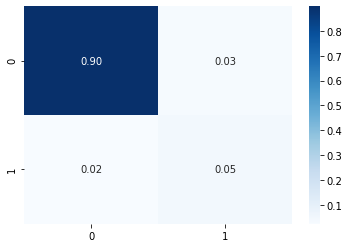

In [141]:
import seaborn as sns
sns.heatmap(ytest_bow_confusion_matrix/np.sum(ytest_bow_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

# Using TFIDF Vectorizer

In [142]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [143]:
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(xtrain_tdif,ytrain_tdif)
pickle.dump(passive,open("model.pkl","wb"))

In [144]:
ytest_tdif_pred=passive.predict(xtest_tdif)

In [145]:
from sklearn import metrics
tdif_accuracy_score=metrics.accuracy_score(ytest_tdif,ytest_tdif_pred)
print(tdif_accuracy_score*100)

95.68277803847958


In [146]:
from sklearn.metrics import confusion_matrix,classification_report

In [147]:
print(classification_report(ytest_tdif,ytest_tdif_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5950
           1       0.73      0.60      0.66       443

    accuracy                           0.96      6393
   macro avg       0.85      0.79      0.82      6393
weighted avg       0.95      0.96      0.95      6393



In [148]:
ytest_tdif_confusion_matrix=metrics.confusion_matrix(ytest_tdif,ytest_tdif_pred)

In [149]:
print(ytest_tdif_confusion_matrix)

[[5849  101]
 [ 175  268]]


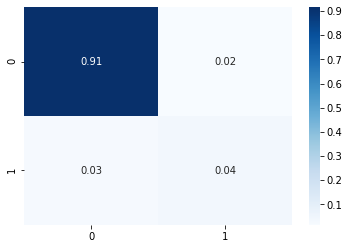

In [150]:
import seaborn as sns
sns.heatmap(ytest_tdif_confusion_matrix/np.sum(ytest_tdif_confusion_matrix),annot=True,fmt = '.2f', cmap='Blues')

# Decision Tree Classifier

# By using Countvectorizer

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
dmodel=DecisionTreeClassifier()

In [153]:
dmodel.fit(xtrain_bow,ytrain_bow)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [154]:
ytest_decision_bow_pred=dmodel.predict(xtest_bow)

In [155]:
from sklearn import metrics

In [156]:
ytest_decision_bow_score=metrics.accuracy_score(ytest_bow,ytest_decision_bow_pred)

In [157]:
print(ytest_decision_bow_score*100)

94.33755670264352


In [158]:
from sklearn.metrics import confusion_matrix,classification_report

In [159]:
print(classification_report(ytest_bow,ytest_decision_bow_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5950
           1       0.58      0.65      0.61       443

    accuracy                           0.94      6393
   macro avg       0.78      0.81      0.79      6393
weighted avg       0.95      0.94      0.94      6393



In [160]:
ytest_decision_bow_confusion_matrix=metrics.confusion_matrix(ytest_bow,ytest_decision_bow_pred)

In [161]:
print(ytest_decision_bow_confusion_matrix)

[[5742  208]
 [ 154  289]]


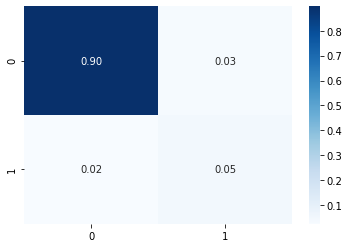

In [162]:
sns.heatmap(ytest_decision_bow_confusion_matrix/np.sum(ytest_decision_bow_confusion_matrix),annot=True,cmap='Blues',fmt='.2f')

# By using tdif vector

In [163]:
dmodel=DecisionTreeClassifier()

In [164]:
dmodel.fit(xtrain_tdif,ytrain_tdif)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [165]:
ytest_decision_tdif_pred=dmodel.predict(xtest_tdif)

In [166]:
from sklearn import metrics

In [167]:
ytest_decision_tdif_score=metrics.accuracy_score(ytest_tdif,ytest_decision_tdif_pred)

In [168]:
print(ytest_decision_tdif_score*100)

94.94759893633662


In [169]:
from sklearn.metrics import confusion_matrix,classification_report

In [170]:
print(classification_report(ytest_tdif,ytest_decision_tdif_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5950
           1       0.64      0.61      0.63       443

    accuracy                           0.95      6393
   macro avg       0.81      0.79      0.80      6393
weighted avg       0.95      0.95      0.95      6393



In [171]:
ytest_decision_tdif_confusion_matrix=metrics.confusion_matrix(ytest_tdif,ytest_decision_tdif_pred)

In [172]:
print(ytest_decision_tdif_confusion_matrix)

[[5798  152]
 [ 171  272]]


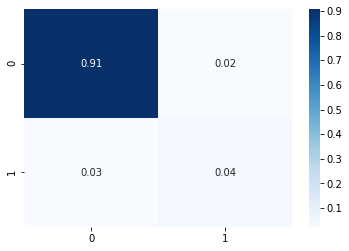

In [173]:
sns.heatmap(ytest_decision_tdif_confusion_matrix/np.sum(ytest_decision_tdif_confusion_matrix),annot=True,cmap='Blues',fmt='.2f')

# Random Forest

# By using countvectorizer

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rmodel=RandomForestClassifier(n_estimators=100)

In [176]:
rmodel.fit(xtrain_bow,ytrain_bow)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
ytest_random_bow_pred=rmodel.predict(xtest_bow)

In [178]:
from sklearn import metrics

In [179]:
ytest_random_bow_score=metrics.accuracy_score(ytest_bow,ytest_random_bow_pred)

In [180]:
print(ytest_random_bow_score*100)

96.16768340372282


In [181]:
from sklearn.metrics import confusion_matrix,classification_report

In [182]:
print(classification_report(ytest_bow,ytest_random_bow_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5950
           1       0.77      0.63      0.70       443

    accuracy                           0.96      6393
   macro avg       0.87      0.81      0.84      6393
weighted avg       0.96      0.96      0.96      6393



In [183]:
ytest_random_bow_confusion_matrix=metrics.confusion_matrix(ytest_bow,ytest_random_bow_pred)

In [184]:
print(ytest_random_bow_confusion_matrix)

[[5867   83]
 [ 162  281]]


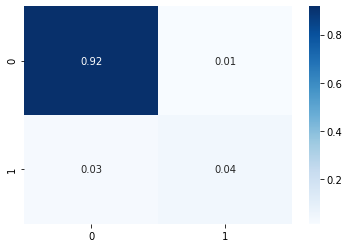

In [185]:
sns.heatmap(ytest_random_bow_confusion_matrix/np.sum(ytest_random_bow_confusion_matrix),annot=True,cmap='Blues',fmt='.2f')

# By using Tdidf vector

In [186]:
rmodel=RandomForestClassifier(n_estimators=100)

In [187]:
rmodel.fit(xtrain_tdif,ytrain_tdif)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [188]:
ytest_random_tdif_pred=rmodel.predict(xtest_tdif)

In [189]:
from sklearn import metrics

In [190]:
ytest_random_tdif_score=metrics.accuracy_score(ytest_tdif,ytest_random_tdif_pred)

In [191]:
print(ytest_random_tdif_score*100)

96.48052557484749


In [192]:
from sklearn.metrics import confusion_matrix,classification_report

In [193]:
print(classification_report(ytest_tdif,ytest_random_tdif_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5950
           1       0.85      0.60      0.70       443

    accuracy                           0.96      6393
   macro avg       0.91      0.80      0.84      6393
weighted avg       0.96      0.96      0.96      6393



In [195]:
ytest_random_tdif_confusion_matrix=metrics.confusion_matrix(ytest_tdif,ytest_random_tdif_pred)

In [196]:
print(ytest_random_tdif_confusion_matrix)

[[5903   47]
 [ 178  265]]


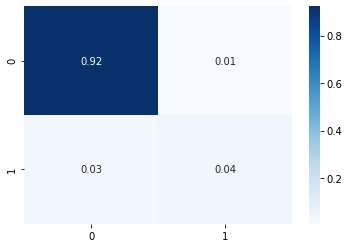

In [198]:
sns.heatmap(ytest_random_tdif_confusion_matrix/np.sum(ytest_random_tdif_confusion_matrix),annot=True,cmap='Blues',fmt='.2f')

## **Plots for comparison in accuracy**

## **Models and their accuracy:**


In [207]:
print("Multinomial Naive Bayes Algorithm")
print("By Counter Vectorizer : ")
print("Accuracy: "+str(ytest_nb_bow_score*100))
print(ytest_nb_bow_confusion_matrix)
print("By tdidf-vector : ")
print("Accuracy: "+str(ytest_nb_tdif_score*100))
print(ytest_nb_tdif_confusion_matrix)
print("--------------------------------------------------------------------------")
print("Logistic Regression Algorithm")
print("By Counter Vectorizer : ")
print("Accuracy: "+str(ytest_lr_bow_score*100))
print(ytest_lr_bow_confusion_matrix)
print("By tdidf-vector : ")
print("Accuracy: "+str(ytest_lr_tdif_score *100))
print(ytest_lr_tdif_confusion_matrix)
print("--------------------------------------------------------------------------")
print("K Nearest Neighbour Algorithm")
print("By Counter Vectorizer : ")
print("Accuracy: "+str(bow_accuracy_score*100))
print(ytest_bow_confusion_matrix)
print("By tfidf-vector : ")
print("Accuracy: "+str(accuracy_score_tfidf*100))
print(ytest_tfidf_confusion_matrix)
print("--------------------------------------------------------------------------")
print("Passive Agressive Classifier Algorithm")
print("By Counter Vectorizer : ")
print("Accuracy: "+str(bow_accuracy_score*100))
print(ytest_bow_confusion_matrix)
print("By tfidf-vector : ")
print("Accuracy: "+str(tdif_accuracy_score*100))
print(ytest_tfidf_confusion_matrix)
print("--------------------------------------------------------------------------")
print("Decision Tree Classifier Algorithm")
print("By Counter Vectorizer : ")
print("Accuracy: "+str(ytest_decision_bow_score*100))
print(ytest_decision_bow_confusion_matrix)
print("By tfidf-vector : ")
print("Accuracy: "+str(ytest_decision_tdif_score*100))
print(ytest_decision_tdif_confusion_matrix)
print("--------------------------------------------------------------------------")
print("Random Forest Classifier Algorithm")
print("By Counter Vectorizer : ")
print("Accuracy: "+str(ytest_random_bow_score*100))
print(ytest_random_bow_confusion_matrix)
print("By tfidf-vector : ")
print("Accuracy: "+str(ytest_random_tdif_score*100))
print(ytest_random_tdif_confusion_matrix)
print("--------------------------------------------------------------------------")

Multinomial Naive Bayes Algorithm
By Counter Vectorizer : 
Accuracy: 94.94759893633662
[[5766  184]
 [ 139  304]]
By tdidf-vector : 
Accuracy: 94.83810417644298
[[5917   33]
 [ 297  146]]
--------------------------------------------------------------------------
Logistic Regression Algorithm
By Counter Vectorizer : 
Accuracy: 96.01126231816049
[[5904   46]
 [ 209  234]]
By tdidf-vector : 
Accuracy: 95.32300954168622
[[5933   17]
 [ 282  161]]
--------------------------------------------------------------------------
K Nearest Neighbour Algorithm
By Counter Vectorizer : 
Accuracy: 94.47833567964962
[[5747  203]
 [ 150  293]]
By tfidf-vector : 
Accuracy: 94.52526200531833
[[5931   19]
 [ 331  112]]
--------------------------------------------------------------------------
Passive Agressive Classifier Algorithm
By Counter Vectorizer : 
Accuracy: 94.47833567964962
[[5747  203]
 [ 150  293]]
By tfidf-vector : 
Accuracy: 95.68277803847958
[[5931   19]
 [ 331  112]]
--------------------------

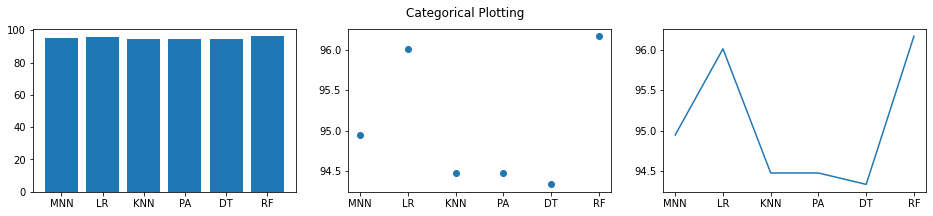

In [216]:
names = ['MNN','LR', 'KNN','PA','DT','RF']
values_cv = [ytest_nb_bow_score*100,ytest_lr_bow_score*100,bow_accuracy_score*100,bow_accuracy_score*100,ytest_decision_bow_score*100,ytest_random_bow_score*100]
values_tdifdf = [ytest_nb_tdif_score,ytest_lr_tdif_score,accuracy_score_tfidf,tdif_accuracy_score,ytest_decision_tdif_score,ytest_random_tdif_score]

plt.figure(figsize=(16, 3))

plt.subplot(131)
plt.bar(names, values_cv)
plt.subplot(132)
plt.scatter(names, values_cv)
plt.subplot(133)
plt.plot(names, values_cv)
plt.suptitle('Categorical Plotting')
plt.show()


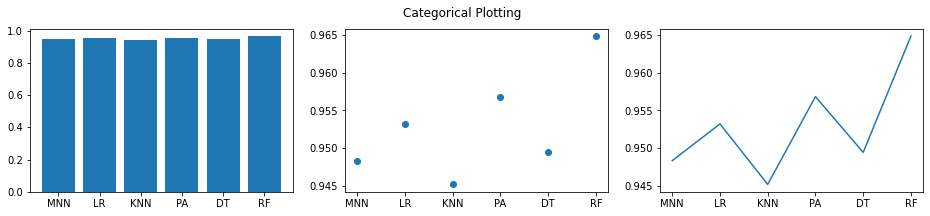

In [217]:
plt.figure(figsize=(16, 3))

plt.subplot(131)
plt.bar(names, values_tdifdf)
plt.subplot(132)
plt.scatter(names, values_tdifdf)
plt.subplot(133)
plt.plot(names, values_tdifdf)
plt.suptitle('Categorical Plotting')
plt.show()